<a href="https://colab.research.google.com/github/ahcamachod/1820-machine-learning-lidiando-con-datos-de-muchas-dimensiones/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Lidiando con datos de muchas dimensiones

Cuando trabajamos con datos que contienen muchas dimensiones, lo recomendable es tomar dichos datos y transformarlos de modo que se ajusten a un espacio dimensional menor asegurándonos de que el espacio dimensional resultante mantenga las propiedades que mejor caracterizan a los datos originales, garantizando su dimensión intrínseca.


En este notebook, estaremos aprendiendo varias estrategias para lidiar con la alta dimensionalidad en el modelaje de aprendizaje de máquina.


El dataset empleado en el desarrollo de este proyecto es un dataset ficticio, llamado a ```aluracare.csv```, adaptado a nuestro contexto, tomando como referencia el siguiente dataset:  

*Dataset:* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# 1. Datos con muchas dimensiones

##### *https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
dataset = pd.read_csv('aluracare.csv')
dataset.head(3)

,id,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,...,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32,examen_33
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,...,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,103.78,1203.0,0.10960,0.15990,0.1974,...,152.5,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN


In [67]:
dataset.shape[0]
print(f'El dataset cuenta con {dataset.shape[0]} filas')

El dataset cuenta con 569 filas


In [68]:
dataset.shape[1]
print(f'El dataset cuenta con {dataset.shape[1]} columnas')


El dataset cuenta con 35 columnas


In [69]:
dataset['diagnostico'].value_counts()

diagnostico
B    357
M    212
Name: count, dtype: int64

In [70]:
dataset.isna().sum()

id               0
diagnostico      0
examen_1         0
examen_2         0
examen_3         0
examen_4         0
examen_5         0
examen_6         0
examen_7         0
examen_8         0
examen_9         0
examen_10        0
examen_11        0
examen_12        0
examen_13        0
examen_14        0
examen_15        0
examen_16        0
examen_17        0
examen_18        0
examen_19        0
examen_20        0
examen_21        0
examen_22        0
examen_23        0
examen_24        0
examen_25        0
examen_26        0
examen_27        0
examen_28        0
examen_29        0
examen_30        0
examen_31        0
examen_32        0
examen_33      419
dtype: int64

In [71]:
nulos = dataset['examen_33'].isnull().sum()

In [72]:
filas = dataset.shape[0]

In [73]:
porcentaje_nulos = (nulos / filas)*100
print(f'El porcentaje de nulos de la columna "examen_33" es de {round(porcentaje_nulos, 2)} %')

El porcentaje de nulos de la columna "examen_33" es de 73.64 %


In [74]:
dataset.drop(columns=['id', 'examen_33'], inplace=True, axis=1)

In [75]:
diccionario_columna_diagnostico = {
    "M": "1",
    "B": "0"
    }
dataset['diagnostico'].replace(diccionario_columna_diagnostico, inplace=True)

In [76]:
dataset.head()

,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
X = dataset.drop(columns='diagnostico', axis=1)
y = dataset['diagnostico']

In [79]:
X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_std, y, test_size=0.3, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression(C=100,n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(C=100, n_jobs=-1)

In [81]:
logistic.score(X_test, y_test)* 100

95.90643274853801

In [82]:
modelo = logistic.score(X_test, y_test)* 100
print(f'Tenemos un modelo LogisticRegression con un {round(modelo, 2)} % de exactitud')

Tenemos un modelo LogisticRegression con un 95.91 % de exactitud


In [83]:
logistic= LogisticRegression(C=1,n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1)

In [84]:
logistic.score(X_test, y_test)* 100

98.24561403508771

In [85]:
modelo = logistic.score(X_test, y_test)* 100
print(f'Tenemos un modelo con un {round(modelo, 2)} % de exactitud')

Tenemos un modelo con un 98.25 % de exactitud


In [86]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
forest.score(X_test, y_test) * 100

96.49122807017544

In [88]:
modelo_forest = forest.score(X_test, y_test) * 100
print(f'Tenemos un modelo RandomForestClassifier con un {round(modelo_forest, 2)} % de exactitud')

Tenemos un modelo RandomForestClassifier con un 96.49 % de exactitud


*** 
***Una buena práctica al iniciar un nuevo proyecto es establecer siempre un punto de partida que sirva como referencia durante el desarrollo del mismo. Este punto de partida se conoce como baseline.
Podemos validar que para clasificar nuestros diagnósticos es mejor para clasificar el modelo LogisticRegression*** 
***

***
***La idea de un workflow de Machine Learning.
Qué son las dimensiones de un dato y datos de alta dimensionalidad.
A identificar y tratar los valores faltantes en una base de datos.
A utilizar la función train_test_split de sklearn.
A normalizar los valores de un dataset utilizando StandardScaler de sklearn.
A crear una baseline utilizando un modelo de clasificación de regresión logística.
A validar una baseline utilizando un modelo de clasificación de bosques aleatorios.***
***

# 2. Avanzando y explorando los datos

##### *https://seaborn.pydata.org/introduction.html*
*https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html*

In [89]:
datos = pd.concat([y, X], axis=1)
datos = pd.melt(datos,id_vars='diagnostico', var_name='examenes', value_name='resultados' )

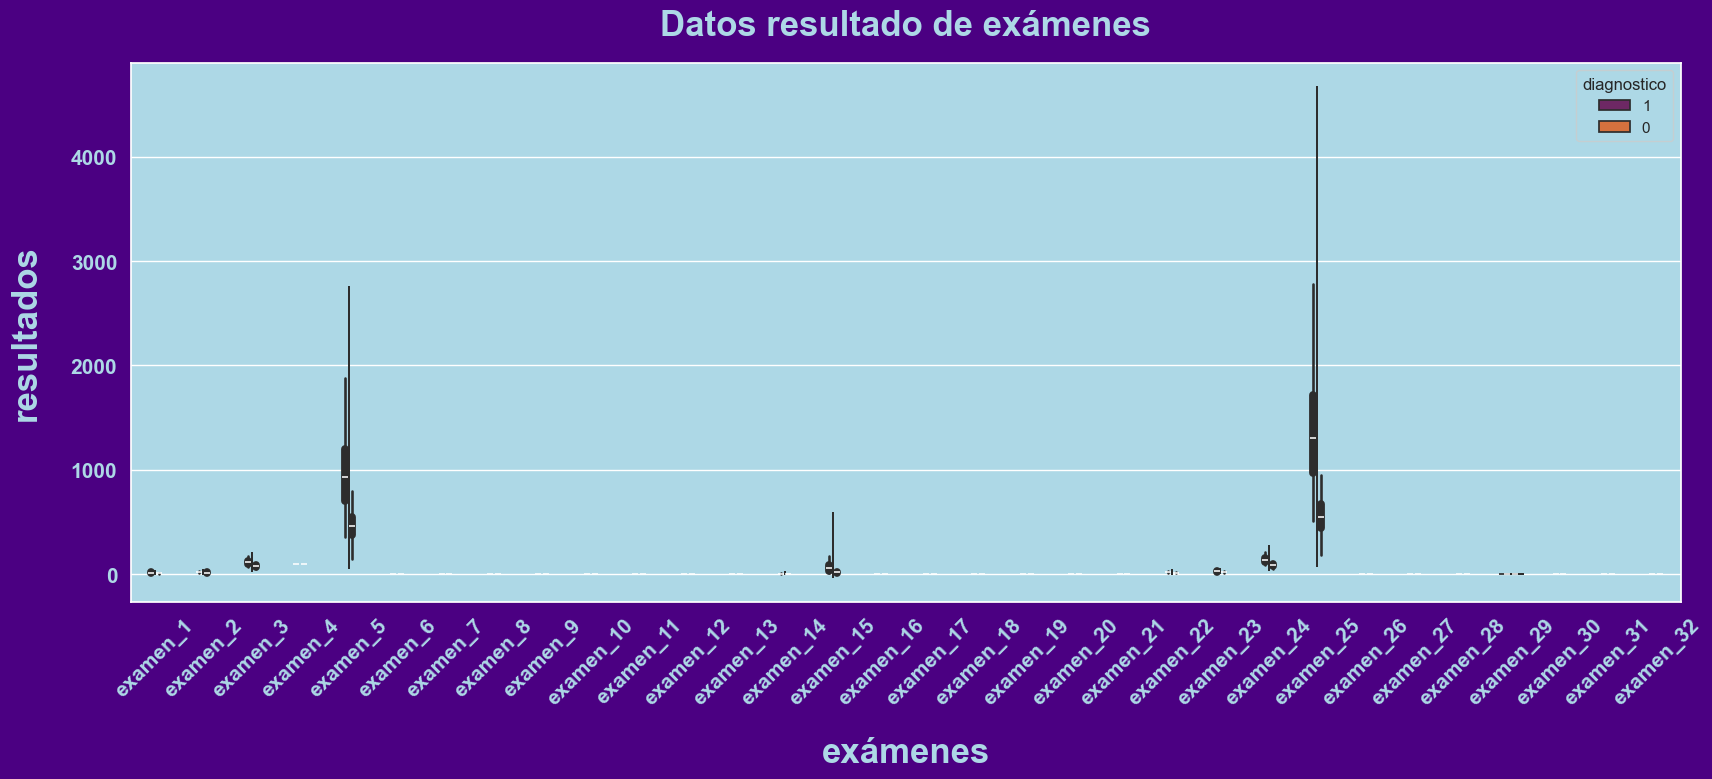

In [90]:
def grafico():
    datos = pd.concat([y, X], axis=1)
    datos = pd.melt(datos,id_vars='diagnostico', var_name='examenes', value_name='resultados' )
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.violinplot(data=datos.iloc[:], x='examenes',y='resultados',hue='diagnostico', palette='inferno', width=0.5, split=True);
    ax.figure.set_size_inches(20,7)
    ax.set_title('Datos resultado de exámenes', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('exámenes', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('resultados',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold', rotation=45)
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(tarjetas['morosos'], loc='upper right', bbox_to_anchor=(1.15,.95))
    plt.show()
grafico()

In [91]:
X1 = pd.DataFrame(X_std, columns=X.keys())
X1.head()

,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


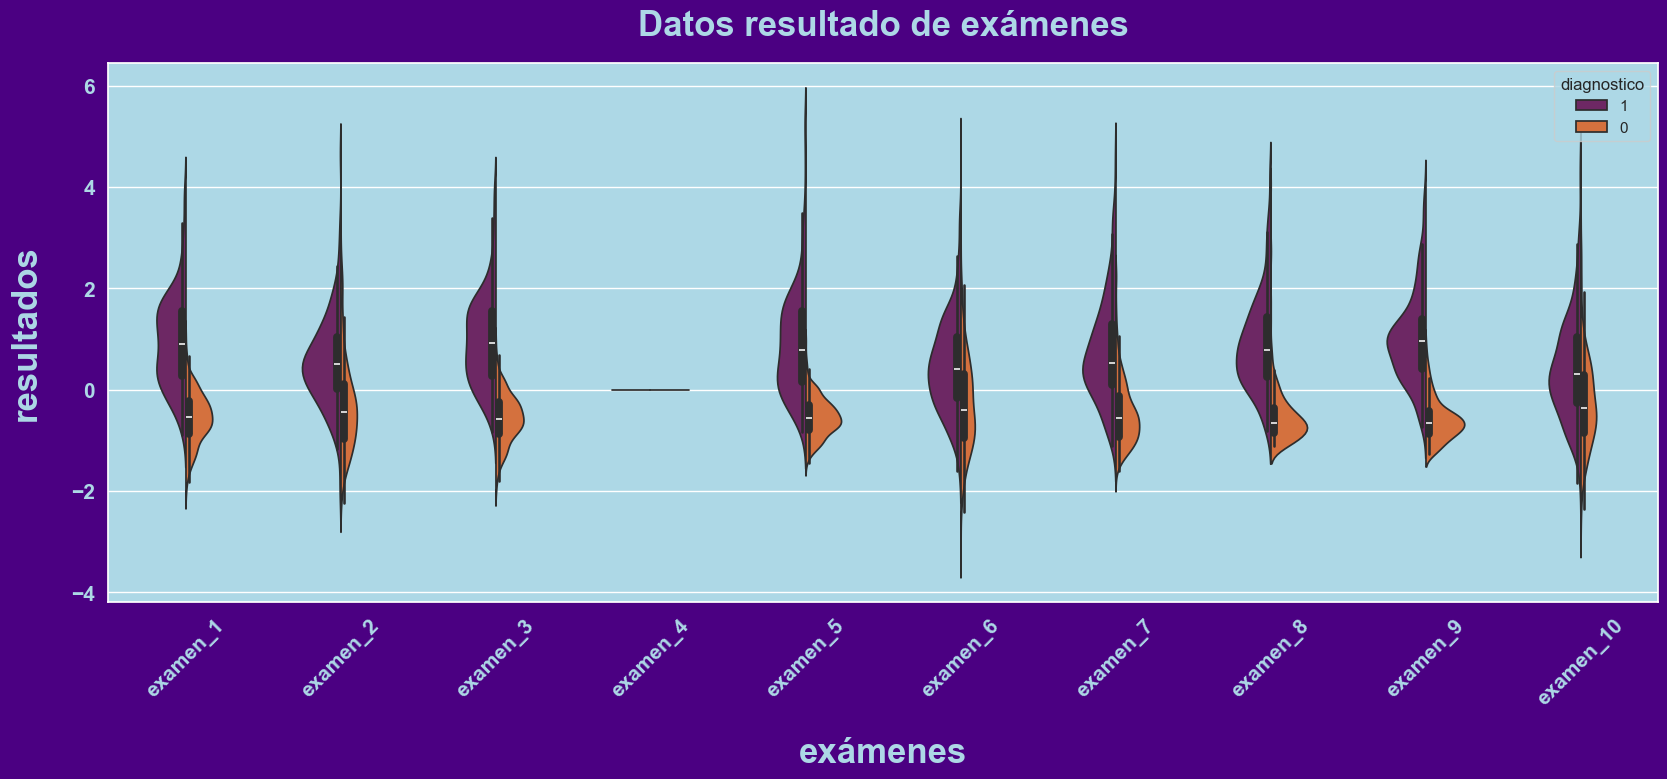

In [92]:
def grafico_violin(inicio, fin):
    datos = pd.concat([y, X1.iloc[:,inicio:fin]], axis=1)
    datos = pd.melt(datos,id_vars='diagnostico', var_name='examenes', value_name='resultados' )
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.violinplot(data=datos, x='examenes',y='resultados',hue='diagnostico', palette='inferno', width=0.5, split=True);
    ax.figure.set_size_inches(20,7)
    ax.set_title('Datos resultado de exámenes', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('exámenes', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('resultados',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold', rotation=45)
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(tarjetas['morosos'], loc='upper right', bbox_to_anchor=(1.15,.95))
    plt.show()
grafico_violin(0, 10)

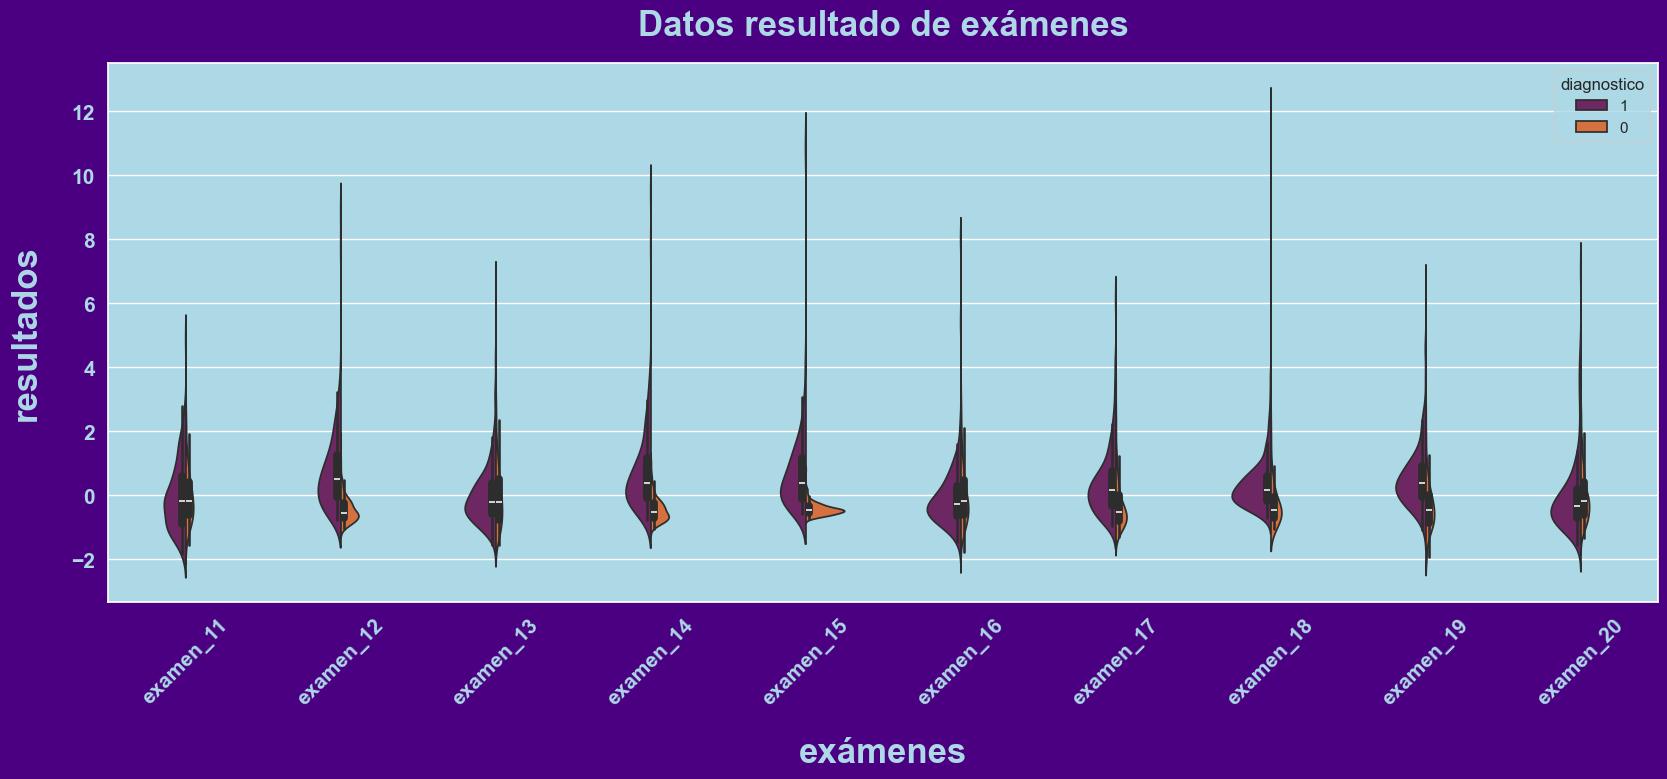

In [93]:
grafico_violin(10,20)

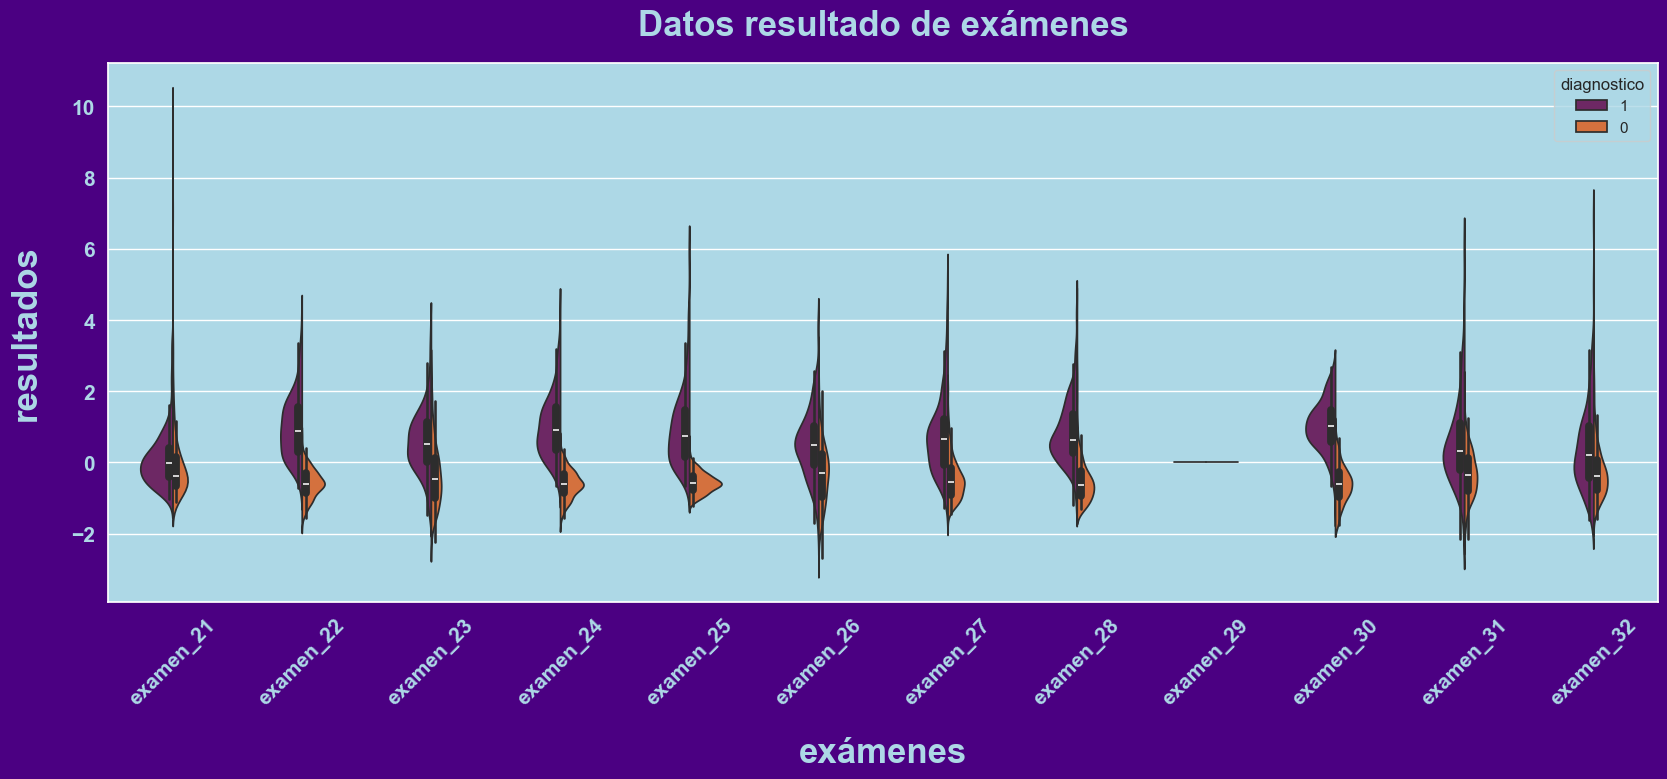

In [94]:
grafico_violin(20,32)

In [95]:
X2 = X1.drop(columns=['examen_29', 'examen_4'], axis=1)

In [96]:
X2.head()

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [97]:
def puntaje(resultados):
    
    X_train, X_test, y_train, y_test = train_test_split( resultados, y, test_size=0.3, random_state=42)
    logistic= LogisticRegression(C=1,n_jobs=-1)
    logistic.fit(X_train, y_train)
    return logistic.score(X_test, y_test)
puntaje1 = puntaje(X1)*100   
print(f'La exactitud es de: {round(puntaje1, 2)} %')

La exactitud es de: 98.25 %


In [98]:
puntaje2 = puntaje(X2)*100   
print(f'La exactitud es de: {round(puntaje2, 2)} %')

La exactitud es de: 98.25 %


# 3. Datos correlacionados

In [99]:
X2.corr()

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
examen_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
examen_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
examen_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
examen_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
examen_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
examen_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
examen_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
examen_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
examen_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


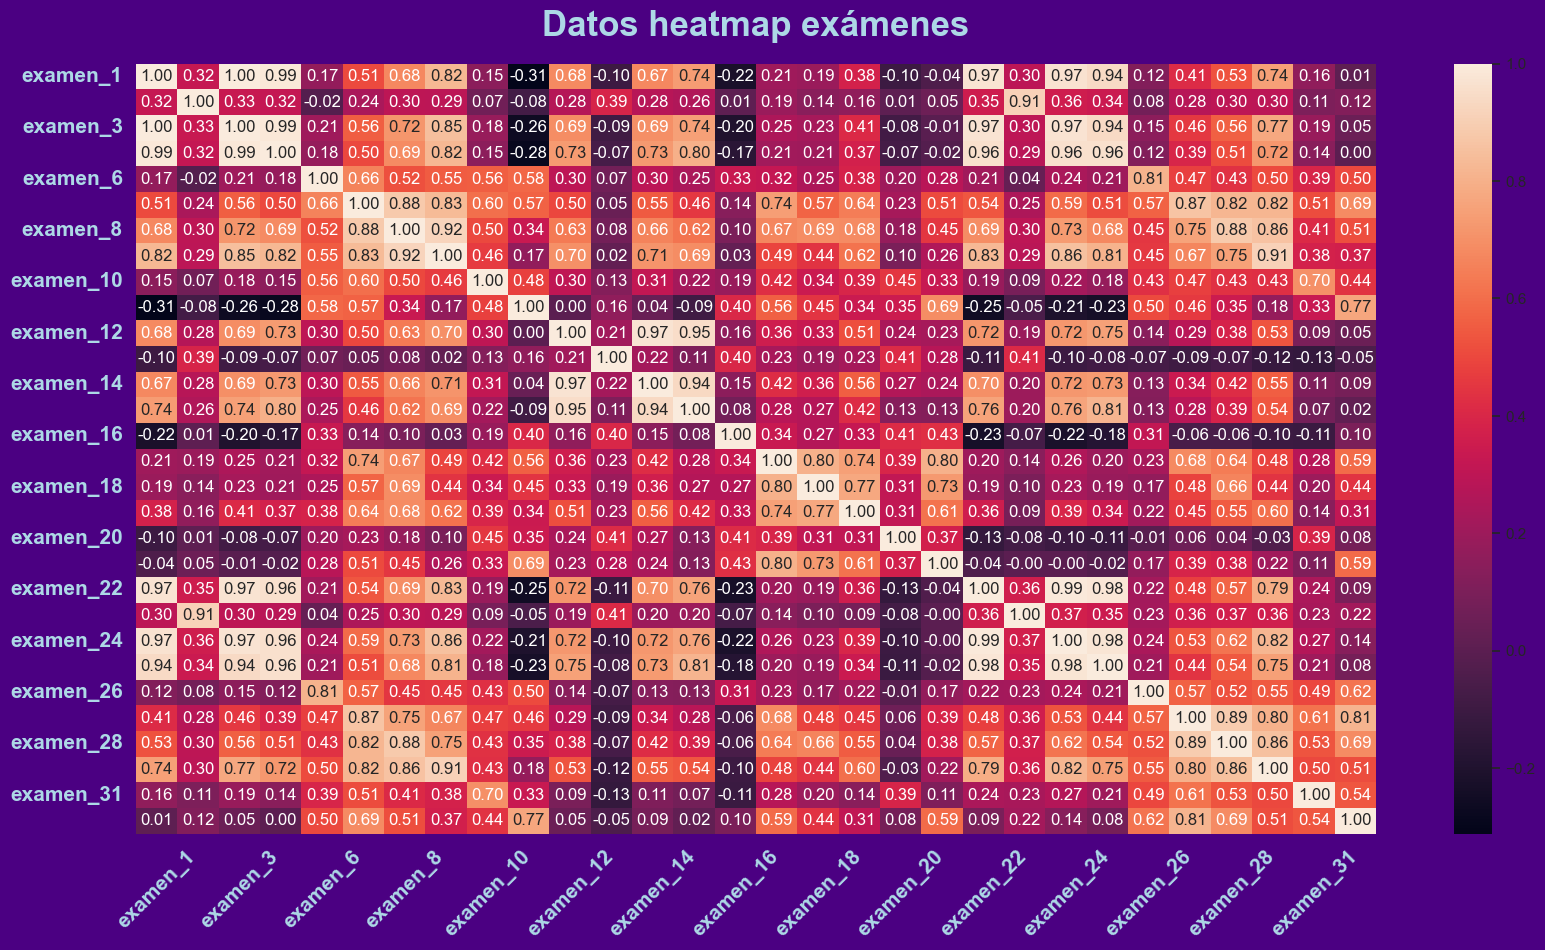

In [100]:
def grafico():
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.heatmap(X2.corr(), annot=True,fmt='.2f');
    ax.figure.set_size_inches(20,10)
    ax.set_title('Datos heatmap exámenes', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    # ax.set_xlabel('exámenes', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    # ax.set_ylabel('resultados',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold', rotation=45)
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(X2.corr(), loc='upper right', bbox_to_anchor=(1.15,.95))
    plt.show()
grafico()

In [101]:
alta_corr = X2.corr()[X2.corr()>0.99]
alta_corr

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
alta_corr.sum()

examen_1     1.997855
examen_2     1.000000
examen_3     1.997855
examen_5     1.000000
examen_6     1.000000
examen_7     1.000000
examen_8     1.000000
examen_9     1.000000
examen_10    1.000000
examen_11    1.000000
examen_12    1.000000
examen_13    1.000000
examen_14    1.000000
examen_15    1.000000
examen_16    1.000000
examen_17    1.000000
examen_18    1.000000
examen_19    1.000000
examen_20    1.000000
examen_21    1.000000
examen_22    1.993708
examen_23    1.000000
examen_24    1.993708
examen_25    1.000000
examen_26    1.000000
examen_27    1.000000
examen_28    1.000000
examen_30    1.000000
examen_31    1.000000
examen_32    1.000000
dtype: float64

In [103]:
X3 = X2.drop(columns=['examen_3', 'examen_24'], axis=1)

In [104]:
X3.head()

,examen_1,examen_2,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,...,examen_21,examen_22,examen_23,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [105]:
puntaje(X3)

0.9824561403508771

In [106]:
def puntaje(resultados):
    
    X_train, X_test, y_train, y_test = train_test_split( resultados, y, test_size=0.3, random_state=42)
    logistic= LogisticRegression(C=1,n_jobs=-1)
    logistic.fit(X_train, y_train)
    return logistic.score(X_test, y_test)
puntaje3 = puntaje(X3)*100   
print(f'La exactitud es de: {round(puntaje3, 2)} %')

La exactitud es de: 98.25 %


# 4. Automatizando la selección de los datos

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html*

In [107]:
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func=chi2, k=5)

In [108]:
X4 = X.drop(columns=['examen_29','examen_3','examen_24','examen_4'], axis=1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X4,y, test_size=0.3,random_state=42)
kbest.fit(X_train, y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x000001F912FD2D40>)

In [110]:
kbest_train = kbest.transform(X_train)
kbest_test = kbest.transform(X_test)
logistic = LogisticRegression()
logistic.fit(kbest_train, y_train)

LogisticRegression()

In [111]:
print(f'La exactitud usando seleckbest es: {round(logistic.score(kbest_test, y_test), 2)*100} %')

La exactitud usando seleckbest es: 96.0 %


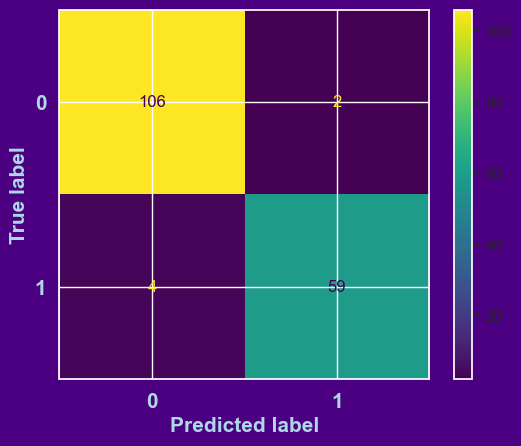

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay
def confision():
    ConfusionMatrixDisplay.from_estimator(logistic,kbest_test, y_test )
    plt.xlabel('Predicted label',color='lightblue', size=15, fontweight='bold')
    plt.ylabel('True label',color='lightblue', size=15, fontweight='bold')
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
confision()

In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [114]:
def seleccion(train, test):
    model = logistic.fit(train, y_train)
    a = f'La tasa de acierto: {round(recall_score(y_test, model.predict(test), pos_label="1")*100, 2)} %'
    b = f'La presisión: {round(precision_score(y_test, model.predict(test), pos_label="1")*100, 2)} %'
    c = f'El valor F: {round(f1_score(y_test, model.predict(test), pos_label="1")*100, 2)} %'
    d = f'La exactitud es: {round(accuracy_score(y_test, model.predict(test))*100, 2)} %'
    print(f'{a}\n{b}\n{c}\n{d}')
seleccion(kbest_train, kbest_test)

La tasa de acierto: 93.65 %
La presisión: 96.72 %
El valor F: 95.16 %
La exactitud es: 96.49 %


In [115]:
from sklearn.feature_selection import RFE

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X3,y, test_size=0.3,random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfe = RFE(estimator= logistic, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [117]:
rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)

seleccion(rfe_train, rfe_test)

La tasa de acierto: 96.83 %
La presisión: 95.31 %
El valor F: 96.06 %
La exactitud es: 97.08 %


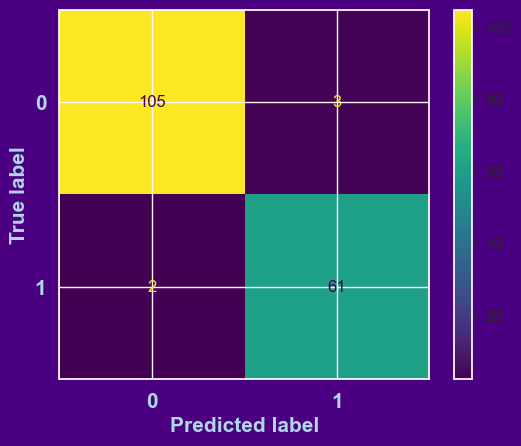

In [118]:
def confision():
    ConfusionMatrixDisplay.from_estimator(logistic,rfe_test, y_test )
    plt.xlabel('Predicted label',color='lightblue', size=15, fontweight='bold')
    plt.ylabel('True label',color='lightblue', size=15, fontweight='bold')
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
confision()

In [119]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False])

In [120]:
X3.columns[rfe.support_]

Index(['examen_12', 'examen_22', 'examen_23', 'examen_25', 'examen_30'], dtype='object')

# 5. Visualizando los datos en el plano

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html*

In [121]:
from sklearn.feature_selection import RFECV

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X3,y, test_size=0.3,random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfecv = RFECV(estimator= logistic, cv=5, step=1, scoring='accuracy')
rfecv.fit(X_train, y_train)
rfecv_train = rfecv.transform(X_train)
rfecv_test = rfecv.transform(X_test)

seleccion(rfecv_train, rfecv_test)

La tasa de acierto: 98.41 %
La presisión: 96.88 %
El valor F: 97.64 %
La exactitud es: 98.25 %


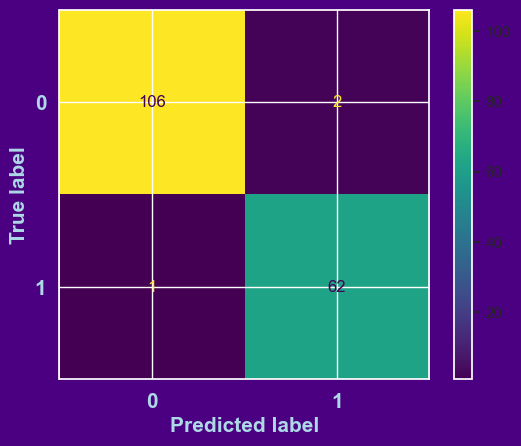

In [123]:
def confision():
    ConfusionMatrixDisplay.from_estimator(logistic,rfecv_test, y_test )
    plt.xlabel('Predicted label',color='lightblue', size=15, fontweight='bold')
    plt.ylabel('True label',color='lightblue', size=15, fontweight='bold')
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
confision()

In [124]:
X3.columns[rfecv.support_]

Index(['examen_1', 'examen_2', 'examen_5', 'examen_7', 'examen_8', 'examen_9',
       'examen_10', 'examen_12', 'examen_13', 'examen_14', 'examen_15',
       'examen_17', 'examen_19', 'examen_20', 'examen_21', 'examen_22',
       'examen_23', 'examen_25', 'examen_26', 'examen_28', 'examen_30',
       'examen_31'],
      dtype='object')

In [125]:
len(X3.columns[rfecv.support_])

22

In [131]:
rfecv.cv_results_

{'mean_test_score': array([0.91199367, 0.92705696, 0.9396519 , 0.94718354, 0.95968354,
        0.96477848, 0.95977848, 0.95977848, 0.96227848, 0.96481013,
        0.96731013, 0.96724684, 0.96724684, 0.96724684, 0.96974684,
        0.96724684, 0.96724684, 0.96724684, 0.96977848, 0.97481013,
        0.97477848, 0.97731013, 0.97731013, 0.97731013, 0.97481013,
        0.97481013, 0.97481013, 0.97481013]),
 'std_test_score': array([0.02279061, 0.01703461, 0.02326425, 0.00969429, 0.02322479,
        0.01472577, 0.02155535, 0.01465036, 0.01776909, 0.01661335,
        0.02035811, 0.02056816, 0.02056816, 0.02056816, 0.02206388,
        0.02056816, 0.02056816, 0.02056816, 0.01714828, 0.01386726,
        0.01792425, 0.0147733 , 0.0147733 , 0.0147733 , 0.01386726,
        0.01386726, 0.01386726, 0.01386726]),
 'split0_test_score': array([0.925 , 0.95  , 0.9375, 0.95  , 0.9875, 0.9875, 0.9875, 0.975 ,
        0.975 , 0.975 , 0.975 , 0.975 , 0.975 , 0.975 , 0.9875, 0.975 ,
        0.975 , 0.975 , 0.

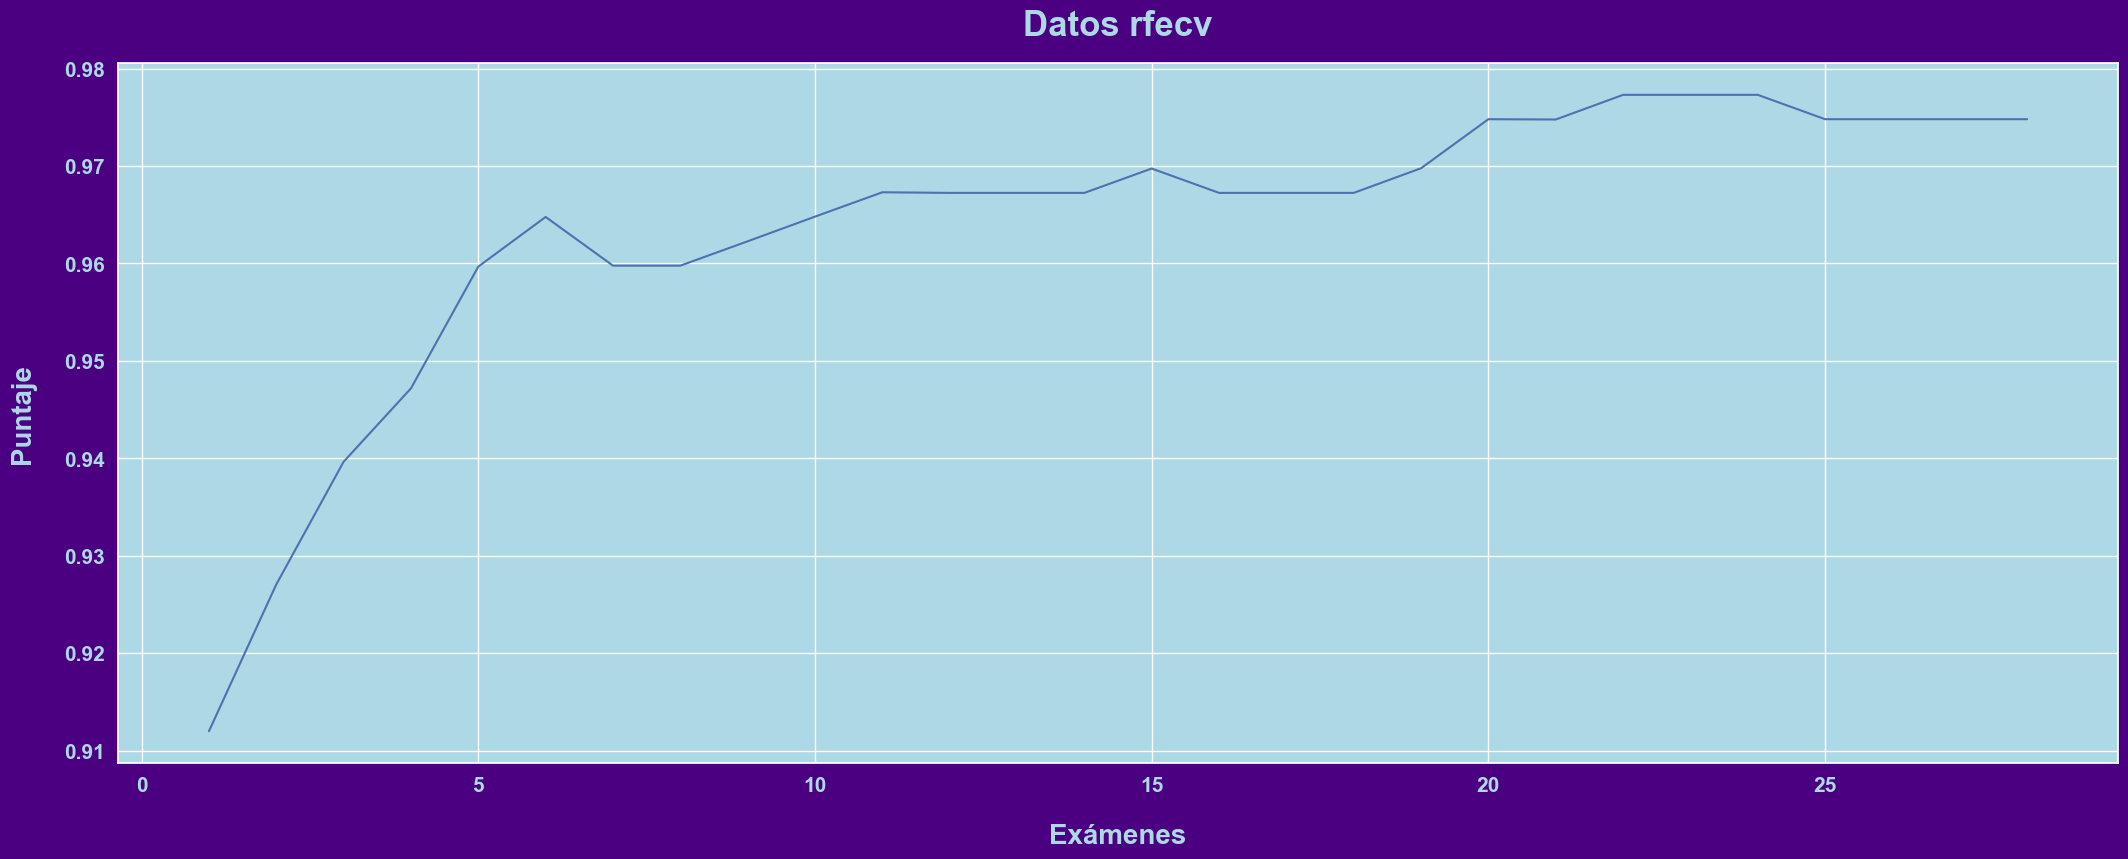

In [143]:
def grafico(rfecv):
    fig = plt.figure(figsize=(20, 7), facecolor='indigo')
    eje = fig.add_axes([0, 0, 1, 1])
    eje.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    eje.set_title('Datos rfecv', size=25, color='lightblue', fontweight='bold', pad=20)
    eje.set_xlabel('Exámenes', size=20, color='lightblue', fontweight='bold', labelpad=20)
    eje.set_ylabel('Puntaje', size=20, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
# Suponiendo que ya has ajustado tu modelo RFECV
# rfecv = RFECV(estimator=..., step=..., cv=...)
# rfecv.fit(X, y)
# Llama a la función grafico() pasando tu objeto RFECV como argumento
grafico(rfecv)



In [144]:
X_train, X_test, y_train, y_test = train_test_split(X3,y, test_size=0.3,random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfe = RFE(estimator= logistic, n_features_to_select=2, step=1)
rfe.fit(X_train, y_train)
rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)

seleccion(rfe_train, rfe_test)

La tasa de acierto: 95.24 %
La presisión: 95.24 %
El valor F: 95.24 %
La exactitud es: 96.49 %


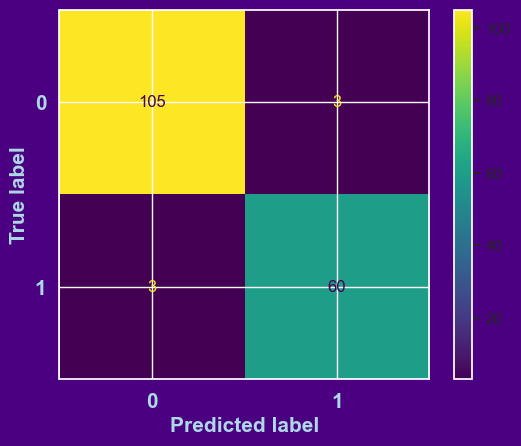

In [145]:
def confision():
    ConfusionMatrixDisplay.from_estimator(logistic,rfe_test, y_test )
    plt.xlabel('Predicted label',color='lightblue', size=15, fontweight='bold')
    plt.ylabel('True label',color='lightblue', size=15, fontweight='bold')
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
confision()

In [146]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False])

In [147]:
X3.columns[rfe.support_]

Index(['examen_25', 'examen_30'], dtype='object')

In [148]:
X5 = X3[['examen_25','examen_30']]
X5.head()

,examen_25,examen_30
0,2.001237,2.296076
1,1.890489,1.087084
2,1.456285,1.955000
3,-0.550021,2.175786
4,1.220724,0.729259


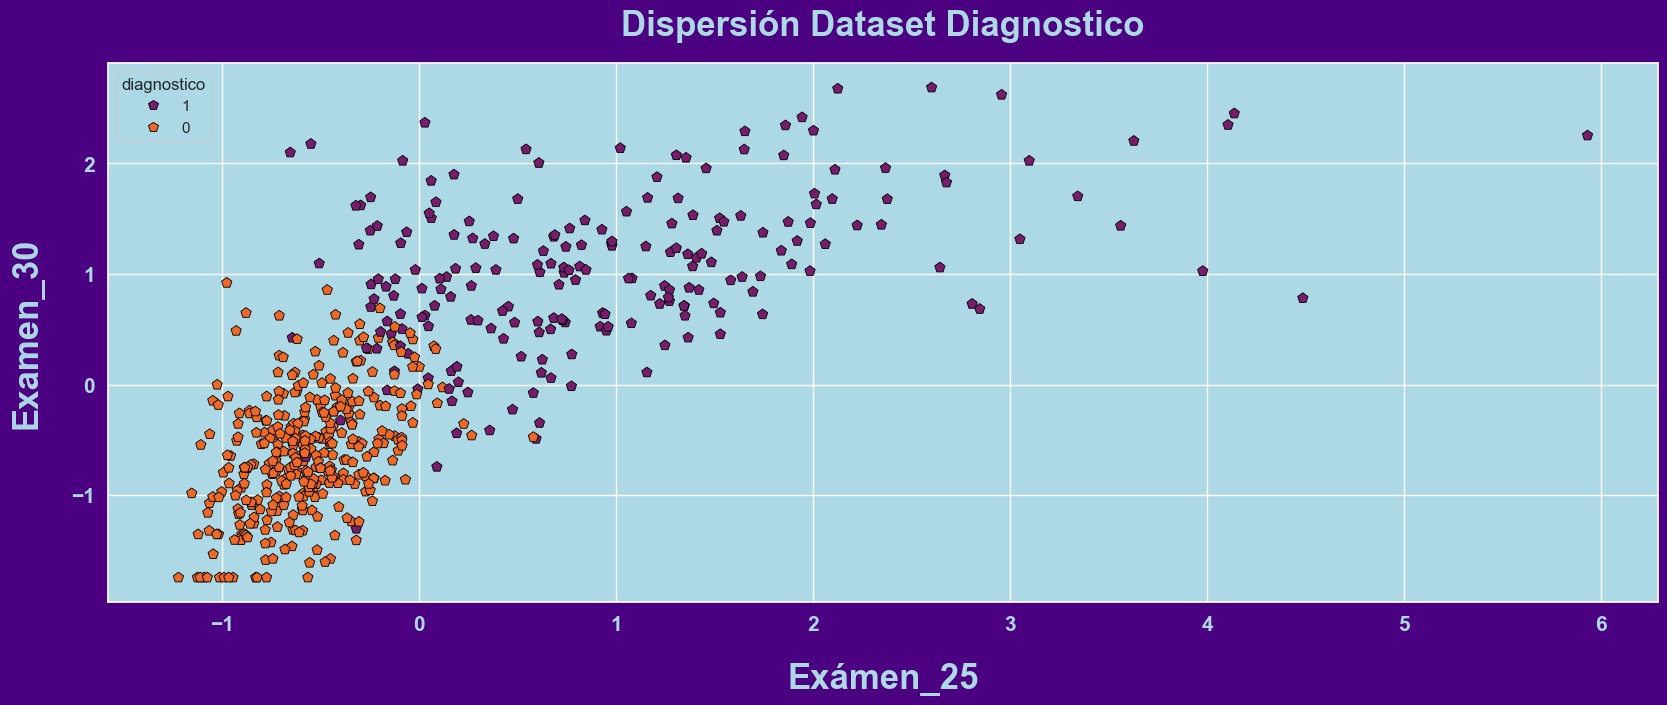

In [168]:
def grafico():
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.scatterplot(x=X5.iloc[:, 0], y=X5.iloc[:, 1], hue=dataset['diagnostico'], palette='inferno', edgecolor='black',s=60, marker='p' )
    ax.figure.set_size_inches(20, 7)
    plt.title('Dispersión Dataset Diagnostico', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('Exámen_25', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('Examen_30', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
grafico()


## PCA Principal Component Analiysis

In [170]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X6 = pca.fit_transform(X3)

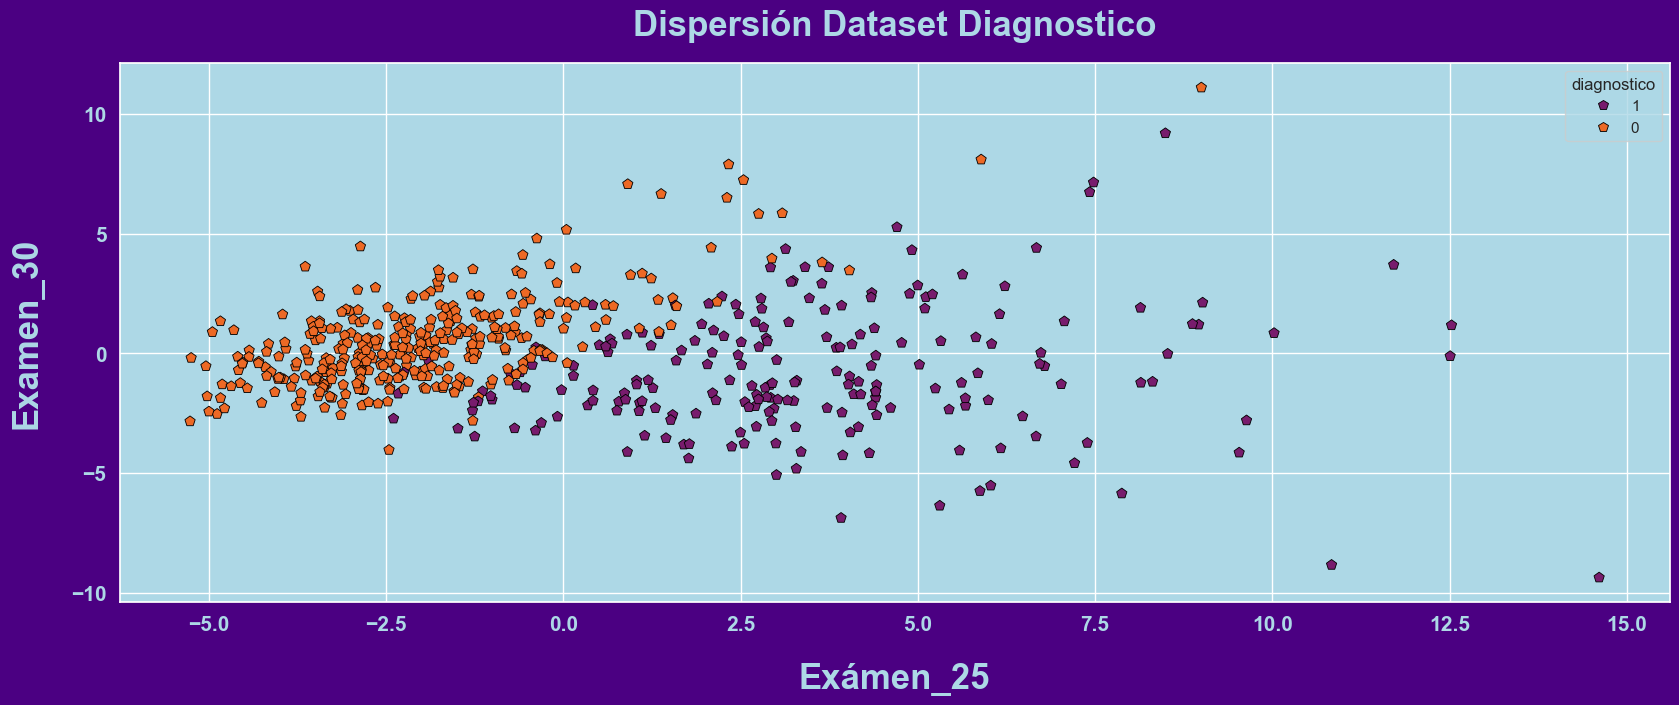

In [171]:
def grafico():
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.scatterplot(x=X6[:, 0], y=X6[:, 1], hue=dataset['diagnostico'], palette='inferno', edgecolor='black',s=60, marker='p' )
    ax.figure.set_size_inches(20, 7)
    plt.title('Dispersión Dataset Diagnostico', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('Exámen_25', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('Examen_30', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
grafico()

In [183]:
pca.explained_variance_ratio_.sum()

0.6094433796711513

## TSNE

In [184]:
from sklearn.manifold import TSNE

In [187]:
tsne = TSNE(n_components=2)
X7 = tsne.fit_transform(X3)

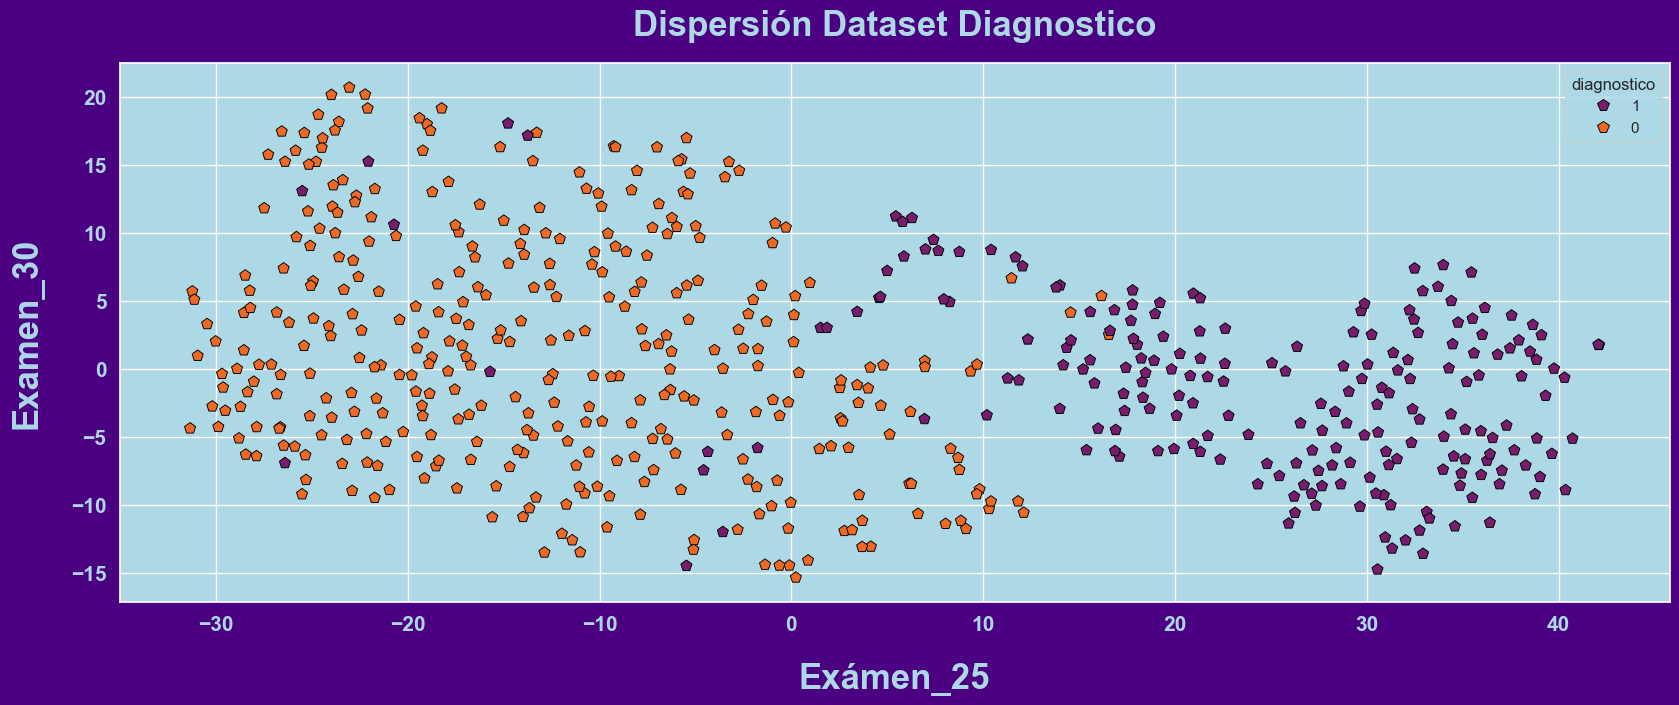

In [189]:
def grafico():
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.scatterplot(x=X7[:, 0], y=X7[:, 1], hue=dataset['diagnostico'], palette='inferno', edgecolor='black',s=70, marker='p' )
    ax.figure.set_size_inches(20, 7)
    plt.title('Dispersión Dataset Diagnostico', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('Exámen_25', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('Examen_30', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
grafico()